State space example
===================

We take a simple system and integrate it numerically

In [2]:
A = matrix([[0, 1],
            [-5, -4]])
B = matrix([[0], 
            [1]])
C = matrix([[1, 0]])
D = matrix([[0]])

ts = linspace(0, 5, 1000)
dt = ts[1]

def u(t):
    if t < 0:
        return matrix([[0]])
    else:
        return matrix([[1]])
    
x0 = matrix([[0], 
             [0]])

ys = zeros_like(ts)


In [3]:
%%timeit
x = matrix(x0)
for i, t in enumerate(ts):
    # Evaluate state-space form
    dxdt = A*x + B*u(t)
    y = C*x + D*u(t)
    
    # Do integration
    x = x + dxdt*dt
    
    # store result
    ys[i] = y[0,0]

1 loops, best of 3: 108 ms per loop


Then analytically using the matrix exponential

In [4]:
from scipy.linalg import expm
y_analytic = zeros_like(ts)
b0 = solve(A, -B)

In [5]:
%%timeit
for i, t in enumerate(ts):
    y = expm(A*t)*b0
    y_analytic[i] = b0[0] - y[0,0]

1 loops, best of 3: 217 ms per loop


The "analytic" method is slower, but no more accurate

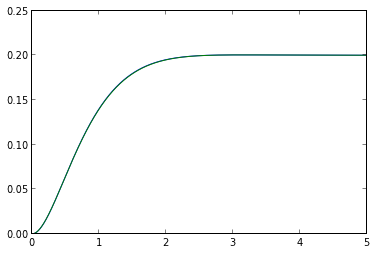

In [6]:
plot(ts, ys, ts, y_analytic)